<h1 style="text-align: center">
Machine Learning HW1 </br> 
Linear Regression in Python
</h1>

#### Name: Ehsan Hassanbeygi

#### Std. Number: 402211723

## Objective
In this python notebook we will focus on $\textit{Linear Regression}$ task. We will show how to prove it mathematically and how to create it in numpy (only with basic matrix operations).
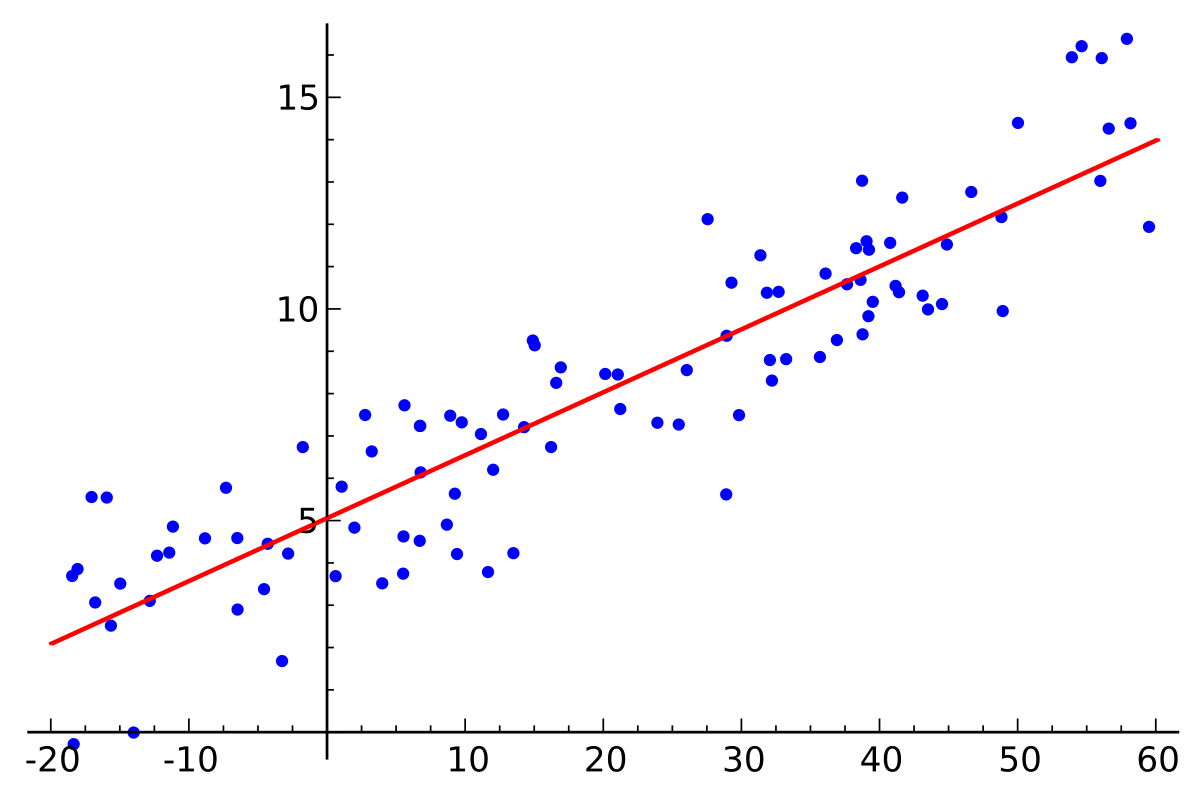

## Problem

For a given set $D = \{(x_n, y_n)\}_{n=1}^N$ predict the $\textit{y}$ for the new $\textbf{x}$. To do it we will have to find function that best approximates the training set.

**You just need to implement parts of code denoted by #To_Do Tag** 

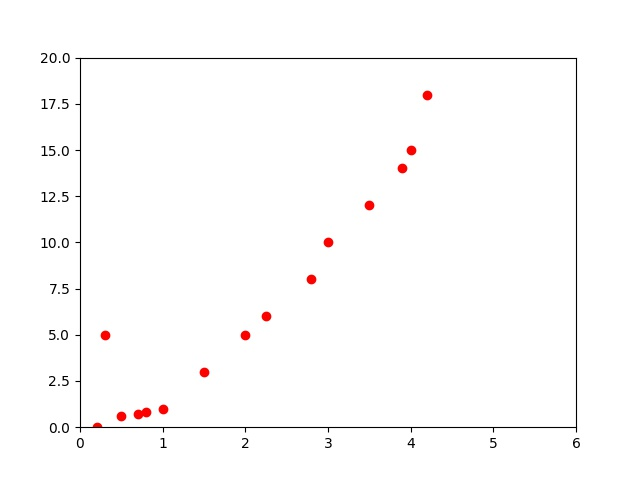 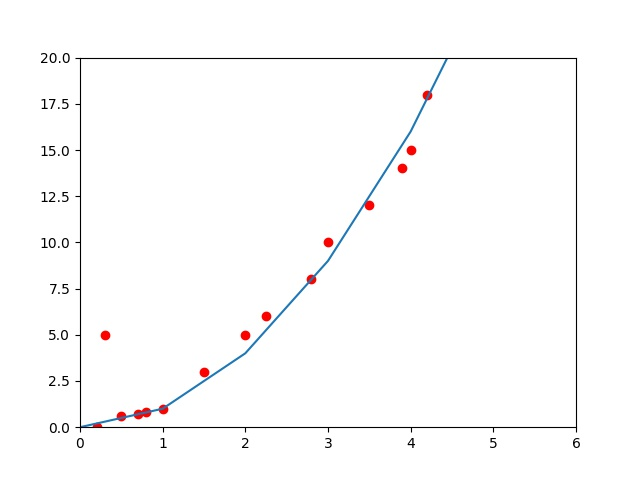

### Example
Flat size of $x_n$ has the price $y_n$. We have the following data:

\begin{array}{|c|c|}
\hline
\text{Flat size} [m^2] & \text{Price} [k \$] \\
\hline
20 & 100 \\
30 & 180 \\
55 & 320 \\
80 & 450 \\
\hline
\end{array}

### Prediction
We want to predict the price $y$ for new flats $x$ based on their size.


\begin{array}{|c|c|}
\hline
\text{Flat size } [m^2] & \text{Price } [k \$] \\
\hline
45 & ? \\
70 & ? \\
\hline
\end{array}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Design matrix $\Phi$

Design matrix $\Phi$ is matrix of values of explanatory variables of a set of objects. Depending on the definition it takes different forms f.e:
<br>
$\phi(x) = \begin{pmatrix}
1 & x & x^2 \\
\end{pmatrix}^T$
<br>
$\phi(x) = \begin{pmatrix}
1 & e^x & e^{2x} \\
\end{pmatrix}^T$
<br>
Where $x$ is the vector of observations $x_n$
<h3> Example: </h3>

$ x = \begin{bmatrix}
           1 \\ 2 \\ 3 
         \end{bmatrix} $

$\phi(x) = \begin{pmatrix}
1 & x & x^2 \\
\end{pmatrix}^T \quad \; \; \Phi=\begin{bmatrix}
       1 & 1 & 1 \\
       1 & 2 & 4 \\
       1 & 3 & 9 \\
     \end{bmatrix}$ 

$\phi(x) = \begin{pmatrix}
1 & e^x & e^{2x} \\
\end {pmatrix}^T \quad \Phi=\begin{bmatrix}
       1 & e^1 & e^2 \\
       1 & e^2 & e^4 \\
       1 & e^3 & e^6 \\
     \end{bmatrix}$
     
<br>
use only first form of polynomial matrix


In [2]:
def design_matrix(x_train, M):
    '''
    :param x_train: vector of input values Nx1
    :param M: degree of polynomial 0,1,2,...
    :return: Design Matrix X_train for polynomial degree of M
    '''
    matrix = []
    matrix.append(np.column_stack([np.power(x_train, i) for i in range(M + 1)]))
    matrix.append(np.column_stack([np.exp(i*x_train) for i in range(M + 1)]))
    
    # alternative way for polynomial
    # matrix = np.vander(x_train, N=None, increasing=True)

    return matrix[0]

In [3]:

a = np.array([1,2,3])
a = np.reshape(a, (3,1))

print("Input vector: \n", a)
print()
print ("Design matrix: \n", design_matrix(a, 4))
print ("Design shape: \n", design_matrix(a, 4).shape)



Input vector: 
 [[1]
 [2]
 [3]]

Design matrix: 
 [[ 1  1  1  1  1]
 [ 1  2  4  8 16]
 [ 1  3  9 27 81]]
Design shape: 
 (3, 5)



## Model

$\textbf{w} \in R^{Dx1} $ is a vector of parameters
<br>
$\Phi \in R^{NxD}$ is a design matrix

$\overline{y} = \Phi \textbf{w} \in R^{Nx1}$ is a vector of model predictions

We need to create method to compute the polynomial value. 
This method takes set $X = \{x_n\}_{n=1}^N$ and set $w = \{w_m\}_{m=1}^{M+1}$. Then computs polynomial values for imputs $x_n$

### Example

Given:

\begin{array}{c}
X = \{1, 2, 3, -4\}
\end{array}


The polynomial is a quadratic polynomial (Second degree polynomial):

\begin{array}{c}
y = c + bx + ax^2
\end{array}



\begin{array}{c}
\textbf{w} = \{1, 3, 2\}
\end{array}


Where:

\begin{array}{ll}
c = 1, & b = 3, \quad a = 2
\end{array}


Calculate the results:

\begin{array}{c}
\{1+3\cdot1+2\cdot1^2, \quad 1+3\cdot2+2\cdot2^2, \quad 1+3\cdot3+2\cdot3^2, \quad 1+3\cdot(-4)+2\cdot(-4)^2\} = \{6, 15, 28, 21\}
\end{array}




In [4]:
def polynomial(X, w):
    '''
    :param x: vector of input values Nx1
    :param w: vector of prameters (M+1)x1 
    :return: vector of polynomial values for the input x
    '''
    M = len(w)-1
    phi = design_matrix(X, M)
    return np.dot(phi, w)

In [5]:
X = np.array([1,2,3,-4])
w = np.array([1, 3, 2])
p = polynomial(X, w)
print("X:", X)
print()
print("Parameters:", w)
print()
print("Result:", p)

X: [ 1  2  3 -4]

Parameters: [1 3 2]

Result: [ 6 15 28 21]


## Mean Squared Error

To measure how good our model is we would use the cost function called Mean Squered Error

$E = \frac{1}{2N}\lVert\overline{\textbf{y}} - \textbf{y}\rVert_2^2$

$\lVert \overline{\textbf{y}} - \textbf{y}\rVert_2$ is called Norm 2 <br>
In linear algebra, functional analysis, and related areas of mathematics, a norm is a function that assigns a strictly positive length or size to each vector in a vector space
<br>

$\lVert\textbf{x}\rVert_2 = \sqrt[2]{\sum_{n=1}^{N} x_n^2}$


In [6]:
def mean_squared_error(y_pred, y_real):
    '''
    :param x: vector of input values Nx1
    :param y: vector of output values Nx1
    :param w: vector of prameters (M+1)x1 
    :return: mean_squared_error between y and predicted_y, where y are actual y values and predicted_y are computed 
    form a polynomial with w parameters
    '''
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)
    error = np.mean(np.power(y_pred - y_real, 2)) / 2
    return error

In [7]:
y_pred = p
y_real = [7, 14, 22, 30]

print("Y predicted", y_pred)
print()
print("Y real", y_real)
print()
print("Mean Squared Error", mean_squared_error(y_pred, y_real))



Y predicted [ 6 15 28 21]

Y real [7, 14, 22, 30]

Mean Squared Error 14.875


# Minimalize cost function
To find best parameters $\textbf{w}$ we have to minimize the cost function. As we know from Calculus to find the function miniumum we have to calculate the derivative (called gradient because we have to find best vector $\textbf{w}$ not a single scalar), set it equal to zero and solve for $\textbf{w}$ . 
<br><br>
$\textbf{N}$ is const. so in the task of minimizing function we can skip it
<br><br>
$E(w) = \frac{1}{2}\lVert\widehat{\textbf{y}} - \textbf{y}\rVert_2^2$
<br>
$\overline{\textbf{y}} = \Phi \textbf{w}$
<br>
$E(w) = \frac{1}{2}\lVert \Phi \textbf{w} - \textbf{y}\rVert_2^2$
<br><br>
Calculate derivative
<br>
$\nabla_w E(w) = \nabla_w (\frac{1}{2} \lVert\Phi \textbf{w} - \textbf{y}\rVert_2^2) = -2\frac{1}{2} \Phi^T( \textbf{y} - \Phi \textbf{w}) =  -\Phi^T( \textbf{y} - \Phi \textbf{w})$
<br><br>
Set it equal to zero
<br>
$\nabla_w E(w) = 0$
<br>
$\Phi^T( \textbf{y} - \Phi \textbf{w}) = 0$
<br>
$\Phi^Ty - \Phi^T\Phi \textbf{w} = 0 $
<br>
$\Phi^Ty = \Phi^T\Phi \textbf{w} $
<br>
$(\Phi^T\Phi)^{-1} \Phi^T\textbf{y} = \mathbb{1}\textbf{w}$
<br>
$\mathbb{1}$ is Identity Matrix
<br>
$ \widehat{\textbf{w}}= (\Phi^T\Phi)^{-1} \Phi^T\textbf{y} $


<h3>Example</h3>
Let us assume, that this is our real function:

$y = (x+3)(x-2) = -6 + x + x^2$

And in our data we have three points:
$A = (1, -4), \space  B = (-3, 0), \space C = (-1, -6)$ which ideally overlap with our function y. 
First of all we need to divde our data, and prepare

$\textbf{x} = \begin{bmatrix}1 \\ -3 \\ -1 \end{bmatrix} $ $\space \textbf{y} = \begin{bmatrix}-4 \\ 0 \\ 6 \end{bmatrix}$ and the real parameters of function $\textbf{w}  = \begin{bmatrix} -6 \\ 1 \\ 1 \end{bmatrix} $

We can also construct our designed matrix and transpose it:

$\Phi = \begin{bmatrix} 1 & 1 & 1 \\ 1 & -3 & 9 \\ 1 & -1 & 1 \end{bmatrix}$

$\Phi^T = \begin{bmatrix} 1 & 1 & 1 \\ 1 & -3 & -1 \\ 1 & 9 & 1 \end{bmatrix}$

Then we have to compute the parameters with the formula shown above:

$\widehat{\textbf{w}}= (\Phi^T\Phi)^{-1} \Phi^T\textbf{y}$

$\widehat{\textbf{w}} = \left ( \begin{bmatrix} 1 & 1 & 1 \\ 1 & -3 & -1 \\ 1 & 9 & 1 \end{bmatrix}
 \times \begin{bmatrix} 1 & 1 & 1 \\ 1 & -3 & 9 \\ 1 & -1 & 1 \end{bmatrix} \right )^{-1} 
 \times \begin{bmatrix} 1 & 1 & 1 \\ 1 & -3 & -1 \\ 1 & 9 & 1 \end{bmatrix}
 \times \begin{bmatrix} -4 \\ 0 \\ 6  \end{bmatrix} = 
 \begin{bmatrix} -6 \\ 1 \\ 1  \end{bmatrix} $
 
 So our estimation $\widehat{\textbf{w}}$  founded with this method is equal to the real $\textbf{w}$ and the error goes to zero.


In [8]:
def least_squares(x_train, y_train, M):
    '''
    :param x_train: vector of input values Nx1
    :param y_train: vector of output values Nx1
    :param M: degree of polynomial
    :return: tuple (w,err), where w are the best polynomial parameters and err mean squared error
    '''
    phi = design_matrix(x_train, M)
    w = np.dot(np.dot(np.linalg.inv(np.dot(phi.T, phi)), phi.T), y_train)
    err = mean_squared_error(polynomial(x_train, w), y_train)

    return (w, err)

In [9]:
x_train = np.array([[1], [-3], [-1]])
y_train = np.array([[-4], [0], [-6]])

print("X coordinates of our training data: \n", x_train)
print()
print("Y coordinates of our training data: \n", y_train)
w = least_squares(x_train, y_train, 2)
print()
print("Estimated parameters w: \n", w[0])

X coordinates of our training data: 
 [[ 1]
 [-3]
 [-1]]

Y coordinates of our training data: 
 [[-4]
 [ 0]
 [-6]]

Estimated parameters w: 
 [[-6.]
 [ 1.]
 [ 1.]]


# Select best model

Now we need to select model, that fits x_val in the best way. To find best polinomial degree, on each degree we will: 


1) Using least_squeres method find best polynomial parameters $ \textbf{w}$ for current degree

2) Using founded parameters $ \textbf{w}$, count error on validation set

3) If error on validation set is smaller then the smallest error, then we change old values to the new parameters as it is the best solution founded by now 



In [10]:
def model_selection(x_train, y_train, x_val, y_val, M_values):
    '''
    :param x_train: vector of input training values Nx1
    :param y_train: vector of output training values Nx1
    :param x_val: vector of input validation values Nx1
    :param y_val: vector of output validation values Nx1
    :param M_values: list of polynomial degrees 
    :return: function returns tuple (w, train_err, val_err), w is vector of model parameters, 
    which fits the model in the best way on the validation set
    train_err and val_err are mean squared errors on the training and validation sets
    '''
    val_err = np.inf
    for M in M_values:
        curr_w, curr_train_err = least_squares(x_train, y_train, M)
        curr_val_err = mean_squared_error(polynomial(x_val, curr_w), y_val)
        if curr_val_err < val_err:
            val_err = curr_val_err
            train_err = curr_train_err
            w = curr_w
        

    return (w, train_err, val_err)

## Finding best parameters visualization


**Don't change anything in this cell**

In [33]:
def run():
    def target_output(x):
        return np.sin(2 * np.pi * x)

    def plot_model(subplot, x_train, y_train, x, y_obj, y_model, x_val=None, y_val=None, train_err=None,
               val_err=None):
        x_min = np.min([np.min(x_train), np.min(x)])
        x_max = np.max([np.max(x_train), np.max(x)])
        y_min = -1.5
        y_max = 1.5
        int_x = x_max - x_min
        x_beg = x_min - int_x / 14.0
        x_end = x_max + int_x / 14.0
        x_ticks = [x_min, x_max]
        int_y = y_max - y_min
        y_ticks = [y_min, y_min + 0.5 * int_y, y_max]

        sub.set_xlim(x_beg, x_end)
        sub.set_ylim(1.1 * y_min, 1.1 * y_max)
        sub.set_xticks(x_ticks)
        sub.set_yticks(y_ticks)
        sub.plot(x_train, y_train, 'o', markerfacecolor='none', markeredgecolor='blue', markersize=8,
                 markeredgewidth=2)
        sub.plot(x, y_obj, '-g', linewidth=2)
        sub.plot(x, y_model, '-r', linewidth=2)
        if x_val is not None and y_val is not None:
            sub.plot(x_val, y_val, 'o', markerfacecolor='none', markeredgecolor='red', markersize=8,
                     markeredgewidth=2)
        if train_err is not None and val_err is not None:
            sub.text(0, -1.3, 'Train error: {0:.5f}\nVal error:    {1:.5f}'.format(train_err, val_err),
                     bbox={'facecolor': 'none', 'pad': 10})

    
    
    def create_data():
        np.random.seed(1)
        x_train_8 = np.random.sample((8,1))*1.5
        x_train_50 = np.random.rand(50,1)
        x_val_10 = np.random.rand(10,1)
        x_val_20 = np.random.rand(20,1)
        y_train_8 = target_output(x_train_8) + np.random.randn(8,1)/3
        y_train_50 = target_output(x_train_50) + np.random.randn(50,1)/3
        y_val_10 = target_output(x_val_10) + np.random.randn(10,1)/3
        y_val_20 = target_output(x_val_20) + np.random.randn(20,1)/3
        
        created_data = {'x_train_8': x_train_8, 'x_train_50': x_train_50, 'x_val_10': x_val_10, 'x_val_20': x_val_20, 
                        'y_train_8': y_train_8, 'y_train_50': y_train_50, 'y_val_10': y_val_10, 'y_val_20': y_val_20}
        return created_data
    data = create_data()#pickle.load(open('LinearRegression/data.pkl', mode='rb'))
    
    x_plot = np.arange(0, 1.01, 0.01)
    y_obj = target_output(x_plot)

    # Dopasowanie wielomianow metoda najmniejszych kwadratow
    print('\n---Mean ---')
    print('-------------- Training examples amount N=8. --------------')
    fig = plt.figure(figsize=(12, 6), num='Least squuares task for N=8')

    for i in range(8):
        w, err = least_squares(data['x_train_8'], data['y_train_8'], i)
        y_model = polynomial(x_plot, w)
        sub = fig.add_subplot(2, 4, i + 1)
        plot_model(sub, data['x_train_8'], data['y_train_8'], x_plot, y_obj, y_model)
        sub.set_title("M = {}".format(i))

    plt.show()

    print('\n--- Fitting polynomials with least squares method ---')
    print('-------------- Training examples amount N=50. --------------')
    fig = plt.figure(figsize=(12, 6), num='Least squares task for N=50')

    for i in range(8):
        w, err = least_squares(data['x_train_50'], data['y_train_50'], i)
        y_model = polynomial(x_plot, w)
        sub = fig.add_subplot(2, 4, i + 1)
        plot_model(sub, data['x_train_50'], data['y_train_50'], x_plot, y_obj, y_model)
        sub.set_title("M = {}".format(i))

    plt.show()

    # Model selection
    print('\n--- Model Selection ---')
    print('---------------- Polynomial models degree M=0,...,7 ----------------')
    print('- Data training points number N=50. Validation data points number N=20 -')

    M_values = range(0, 7)
    w, train_err, val_err = model_selection(data['x_train_50'], data['y_train_50'],
                                            data['x_val_20'], data['y_val_20'], M_values)
    M = np.shape(w)[0] - 1
    y_model = polynomial(x_plot, w)

    fig = plt.figure(figsize=(6, 5), num='Selection model for M')
    sub = fig.add_subplot(1, 1, 1)
    sub.set_title('The best M={}'.format(M))
    plot_model(sub, data['x_train_50'], data['y_train_50'], x_plot, y_obj, y_model,
               data['x_val_20'], data['y_val_20'], train_err, val_err)

    plt.show()
    


---Mean ---
-------------- Training examples amount N=8. --------------


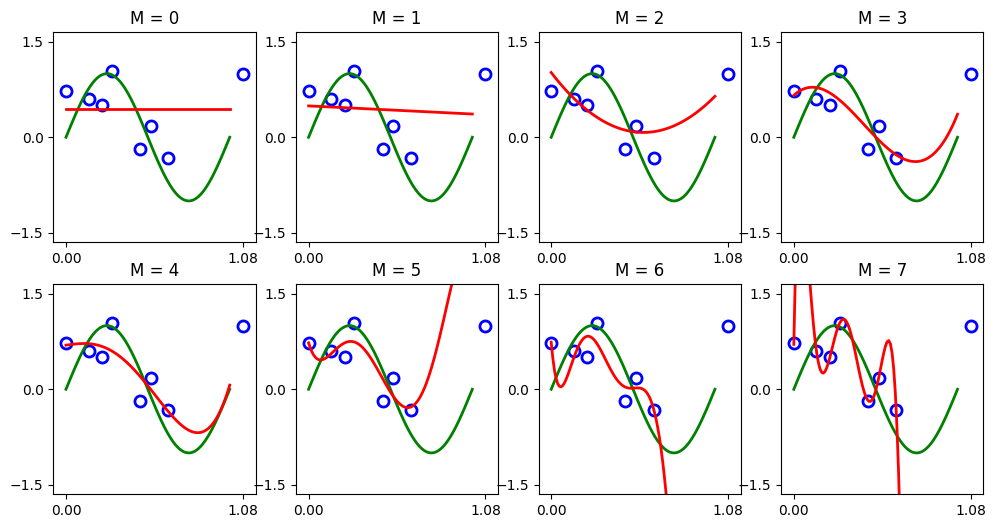


--- Fitting polynomials with least squares method ---
-------------- Training examples amount N=50. --------------


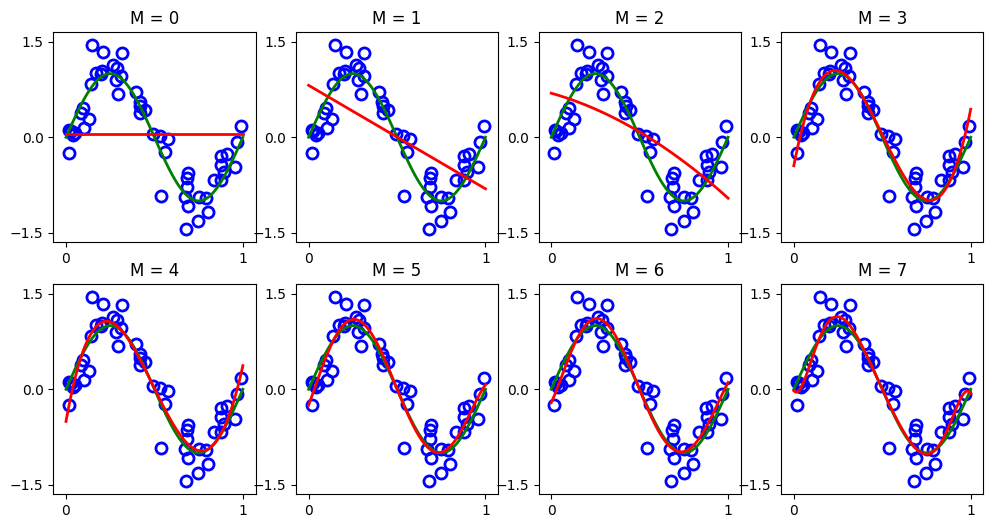


--- Model Selection ---
---------------- Polynomial models degree M=0,...,7 ----------------
- Data training points number N=50. Validation data points number N=20 -


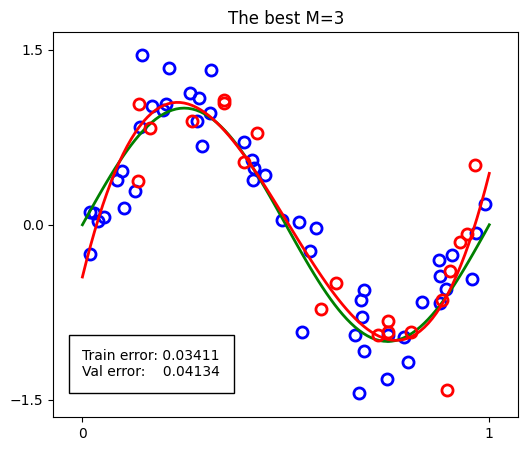

In [34]:
run()

## Gradient Descent

To say the truth - method to compute parameters explained above isn't computionally effective. We can even say, that the computing cost is terrible, aspeccialy for larger data matrixes, and things goes even worse and worse when the number of data dimensions increases. Inversing a matrix has $n^2\cdot\log{n}$ complexity.
There is a way more servicable solution to compute optimal parameters. The method we are going to describe is called Gradient Descent.

<h3>How does it work?</h3>
At first we initialize random parameters, and multiply them properly with inputs. Then we are computing the error between those random predictions and target values. As we got the error, we can compute the derivative of error of the parameters at the exact point we are. Why are we doing this? Derivative give us information about the way in which function changes. With information like that we can substract the value of derivative from parameters, as there we got two possible options:
1. The function grows, so the derivative is positive, and when we are substracting it we are "going back" to the local minimum.
2. The function decreases, so the derivative is negative, and when we are substracting it we are "going forward" to the local minimum. 
It looks beautiful, when we are working with low-dimensional data, as for example imagine yourself that you have $y=x^2$ function, and you are at point (2, 4). Derivative is positive, so after substracting it ( of course after multiplication it by a small parameter called learning rate ) we are moving closer to zero - the minimum.

However, when we have much more dimensions - it is hard to create a cost function that has only one minimum. In that case we are exposed for stucking in some of the local minimum, but there are a few ways of avoiding this, which are not described in this notebook. 

<h3>Learning rate</h3>

The learning rate parameter is a hyperparameter that defines "how fast" our parameters are going to be learned, as we are multiplying value of derivatie by it. We need to be cautios when choosing it, as too large learning rate can make us to miss the local minimum. We wouldn't be able to go to "zero" in the $y = x^2$ function we can jump from point (2, 4) to (-2, 4) and back, when it is going to be too large. On the other side choosing a very small learning rate can make our program to find optimal parameters even slower than using the formula which involves matrix inversing. 

<h3><i>TL;DR<i> - Gradient Descent in steps</h3>
1. <h4>Define Cost function</h4> 
Define the cost function to measure the diffrence between predictions and target outputs. We assume that we are working with first degree polynomial, to make derivative calculations easier to present. ( Linear function y = wx +b )
$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$
Where N is an observations amount

2. <h4>Compute the derivative</h4>
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>

for better understanding see this tutorial : [Gradient Descent](https://www.youtube.com/watch?v=IHZwWFHWa-w)

In [27]:
def gradient_descent(x, y_expected, epochs=1000, learning_rate=0.00001):
    '''   
    :param x: vector of input training values Nx1
    :param y_expected: vector of output training values Nx1
    :param epochs: amount of training epochs
    :param learning_rate: rate of learning speed
    '''
    x = np.array(x).reshape(-1,1)
    y_expected = np.array(y_expected).reshape(-1,1)

    w = random.uniform(0, 1)
    b = random.uniform(0, 1)
    N = x.shape[0]
    cost = []
    for i in range(epochs):
        cost.append(np.mean(np.power(y_expected - (w * x + b), 2)))
        dw = (-2 / N) * np.dot(x.T, y_expected - (w * x + b))[0, 0]
        db = (-2 / N) * np.sum(y_expected - (w * x + b))
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b, cost

W expected: 5 and b expected: 10

W calculated: 3.31 and b calculated: 0.60


In [21]:
x = np.array([[i for i in range(10)]]).T
y = np.array([[5 * i + 10 + random.uniform(-.1, .1) for i in range(10)]]).T
print("W expected: {} and b expected: {}".format(5, 10))
print()
w, b, _ = gradient_descent(x,y)
print("W calculated: {:.2f} and b calculated: {:.2f}".format(w, b))

W expected: 5 and b expected: 10

W calculated: 4.50 and b calculated: 1.57


<h3>Real world example</h3>
We are going to predict student score according to the amount of hours they studied.

**Don't change anything in this cell**

In [28]:
def real_world_example():
    points = np.genfromtxt("data.txt", delimiter=',')
    print('Some example hours and scores from exam:')
    print(points[:5])
    x, y = points[0], points[1]
    w, b, costs = gradient_descent(x, y, epochs=30000, learning_rate=1e-8)
    plt.plot(costs)
    plt.title('Cost')
    plt.xlabel('Epoch number')
    plt.ylabel('Cost value')
    plt.grid()
    plt.show()
    x_plot = np.arange(20, 70, 0.5)
    y_plot = x_plot*w+b
    
    hours = points[:,0]
    scores = points[:,1]
    plt.plot(hours, scores, '.', x_plot, y_plot, '-')
    plt.xlabel('Hours of study')
    plt.ylabel('Scores on exam')
    plt.legend(['Score points', 'Linear regression'])
    plt.grid()
    
    plt.show()


Some example hours and scores from exam:
[[32.50234527 31.70700585]
 [53.42680403 68.77759598]
 [61.53035803 62.5623823 ]
 [47.47563963 71.54663223]
 [59.81320787 87.23092513]]


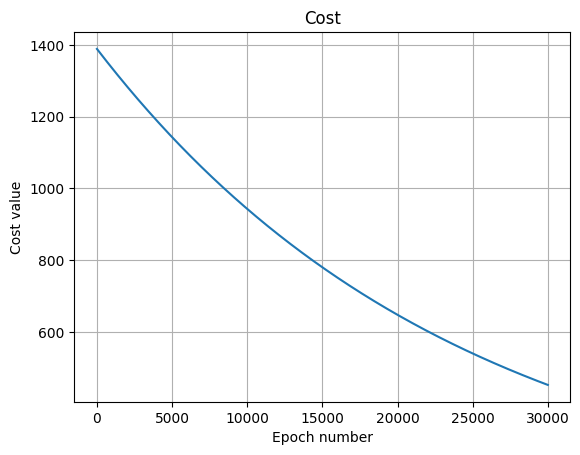

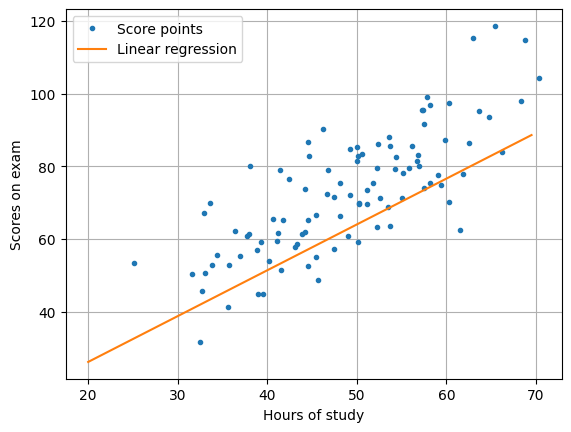

In [30]:
real_world_example()